In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten, Convolution2D, Dropout
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import shutil
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv(r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\train.csv')
test = pd.read_csv(r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\test.csv')


# Concatenate train and test data for consistent processing
combined_data = pd.concat([train, test], ignore_index=True)

# Preparing classes for labeling
traindata = combined_data[['id','species']].copy()
traindata['id'] = traindata['id'].astype(str)
traindata['label'] = LabelEncoder().fit_transform(traindata['species'])


# Loading Images and Linking Labels
images = r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\images'

# List comprehension to load images and link labels
imgs = [Image.open(os.path.join(images, i)).convert('1') 
        for i in sorted(os.listdir(images)) 
        if i.split('.')[0] in traindata['id'].values]

# Matching labels using list comprehension
labels = [traindata[traindata['id'] == i.split('.')[0]]['label'].values[0] 
          for i in sorted(os.listdir(images)) 
          if i.split('.')[0] in traindata['id'].values]

# Displaying information
print(f"We have {len(imgs)} images in the dataset")
print(f"Dataset have {len(np.unique(labels))} labels ")

We have 1584 images in the dataset
Dataset have 100 labels 


In [6]:
imgs

[<PIL.Image.Image image mode=1 size=526x467>,
 <PIL.Image.Image image mode=1 size=858x363>,
 <PIL.Image.Image image mode=1 size=666x409>,
 <PIL.Image.Image image mode=1 size=588x509>,
 <PIL.Image.Image image mode=1 size=499x581>,
 <PIL.Image.Image image mode=1 size=478x560>,
 <PIL.Image.Image image mode=1 size=601x621>,
 <PIL.Image.Image image mode=1 size=997x528>,
 <PIL.Image.Image image mode=1 size=502x350>,
 <PIL.Image.Image image mode=1 size=231x535>,
 <PIL.Image.Image image mode=1 size=744x603>,
 <PIL.Image.Image image mode=1 size=711x595>,
 <PIL.Image.Image image mode=1 size=192x528>,
 <PIL.Image.Image image mode=1 size=401x673>,
 <PIL.Image.Image image mode=1 size=485x591>,
 <PIL.Image.Image image mode=1 size=786x667>,
 <PIL.Image.Image image mode=1 size=218x509>,
 <PIL.Image.Image image mode=1 size=304x357>,
 <PIL.Image.Image image mode=1 size=700x370>,
 <PIL.Image.Image image mode=1 size=654x271>,
 <PIL.Image.Image image mode=1 size=407x743>,
 <PIL.Image.Image image mode=1 siz

In [7]:
labels

[3,
 54,
 20,
 1,
 45,
 3,
 9,
 13,
 2,
 66,
 59,
 99,
 99,
 62,
 79,
 6,
 99,
 17,
 43,
 99,
 83,
 26,
 99,
 1,
 99,
 99,
 12,
 99,
 49,
 71,
 89,
 99,
 58,
 99,
 99,
 88,
 93,
 39,
 42,
 99,
 15,
 99,
 38,
 55,
 99,
 15,
 99,
 93,
 4,
 90,
 99,
 99,
 99,
 88,
 99,
 55,
 40,
 99,
 99,
 55,
 17,
 99,
 99,
 99,
 34,
 99,
 99,
 94,
 34,
 99,
 57,
 92,
 99,
 99,
 81,
 26,
 99,
 99,
 99,
 92,
 99,
 99,
 60,
 89,
 99,
 99,
 49,
 89,
 99,
 99,
 79,
 30,
 65,
 99,
 58,
 99,
 4,
 99,
 19,
 4,
 76,
 82,
 74,
 99,
 99,
 71,
 21,
 54,
 13,
 16,
 72,
 99,
 78,
 99,
 68,
 62,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 61,
 99,
 25,
 72,
 99,
 99,
 99,
 7,
 12,
 18,
 99,
 77,
 90,
 99,
 62,
 14,
 3,
 99,
 99,
 78,
 99,
 99,
 65,
 37,
 27,
 99,
 50,
 95,
 98,
 99,
 99,
 99,
 99,
 99,
 99,
 60,
 99,
 72,
 58,
 99,
 38,
 87,
 99,
 20,
 99,
 99,
 93,
 19,
 7,
 99,
 83,
 50,
 99,
 3,
 32,
 91,
 99,
 99,
 77,
 99,
 7,
 64,
 61,
 69,
 23,
 99,
 76,
 65,
 48,
 41,
 92,
 20,
 91,
 99,
 99,
 18,
 4,
 70,
 

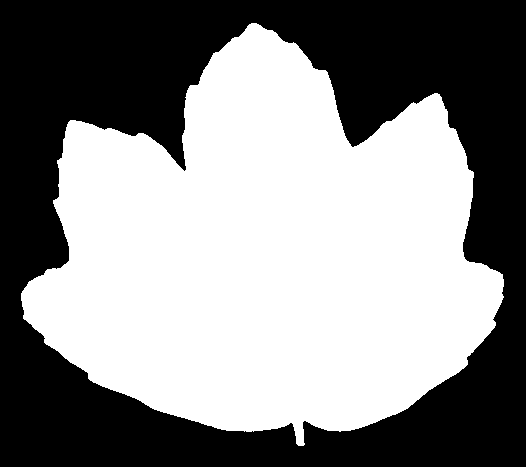

In [8]:
imgs[0]

In [10]:
traindata.head(10)

,id,species,label
0,1,Acer_Opalus,3
1,2,Pterocarya_Stenoptera,49
2,3,Quercus_Hartwissiana,65
3,5,Tilia_Tomentosa,94
4,6,Quercus_Variabilis,84
5,8,Magnolia_Salicifolia,40
6,10,Quercus_Canariensis,54
7,11,Quercus_Rubra,78
8,14,Quercus_Brantii,53
9,15,Salix_Fragilis,89


In [11]:
# Load an image
image = Image.open(r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\images\1.jpg')

# Get image properties
print(image.size)      # Image size
print(image.mode)

(526, 467)
L


In [12]:
def load_images_as_arrays(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Filter by file extensions
            img = Image.open(os.path.join(directory, filename))
            img_array = np.array(img)
            images.append(img_array)
    return images

images_as_array = load_images_as_arrays(images)
print(len(images_as_array))  # Check the number of loaded images
print(images_as_array)


1584
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0,

In [14]:
print(images_as_array[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
print(images_as_array[0].shape)  # Check the shape of the first image array

print(images_as_array[4].shape)  # Check the shape of the first image array

(467, 526)
(581, 499)


In [16]:
labels_np = np.array(labels)
labels_np

array([ 3, 54, 20, ..., 99, 99, 53])

In [17]:
def resize_images_and_greyscale(images_array, new_size):
    resized_images = []
    for img in images_array:
        pil_img = Image.fromarray(img)
        # Resize
        resized_img = pil_img.resize(new_size)
        # Convert to grayscale
        grayscale_img = resized_img.convert('L')
        resized_images.append(np.array(grayscale_img))
    return resized_images

# Resize images in the array to a new size (e.g., (64, 64)) and convert to greyscale
resized_images = resize_images_and_greyscale(images_as_array, (64, 64))

# Check the shape of the resized and grayscale images
print("Shape of the first image:", resized_images[0].shape)

Shape of the first image: (64, 64)


In [18]:
resized_images[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
resized_images = np.expand_dims(resized_images, axis=-1)

In [20]:
print("Shape of the first image:", resized_images[0].shape)

Shape of the first image: (64, 64, 1)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(resized_images, labels, test_size=0.2, random_state=42,stratify=labels)

In [22]:
print(f"Data have {len(X_train)} images for training")
print(f"Data have {len(X_test)} images for testing")
print(f"Training data consist of  {len(np.unique(Y_train))} classes ")
print(f"Testing data consist of {len(np.unique(Y_test))} classes")

Data have 1267 images for training
Data have 317 images for testing
Training data consist of  100 classes 
Testing data consist of 100 classes


In [23]:
X_train,X_test

(array([[[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         ...,
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]]],
 
 
        [[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         

In [24]:
Y_train,Y_test

([99,
  99,
  91,
  99,
  9,
  99,
  29,
  99,
  96,
  26,
  70,
  36,
  99,
  80,
  99,
  62,
  99,
  99,
  21,
  60,
  99,
  73,
  33,
  57,
  49,
  99,
  47,
  20,
  99,
  52,
  89,
  51,
  95,
  46,
  99,
  67,
  74,
  16,
  99,
  48,
  95,
  68,
  99,
  10,
  82,
  39,
  37,
  98,
  99,
  99,
  99,
  99,
  99,
  74,
  59,
  22,
  5,
  0,
  76,
  99,
  22,
  99,
  15,
  99,
  99,
  71,
  99,
  98,
  91,
  99,
  68,
  74,
  40,
  99,
  99,
  99,
  87,
  99,
  37,
  68,
  99,
  99,
  63,
  34,
  7,
  99,
  1,
  99,
  99,
  76,
  71,
  99,
  1,
  11,
  23,
  99,
  99,
  50,
  99,
  4,
  78,
  99,
  58,
  5,
  99,
  42,
  82,
  26,
  99,
  24,
  11,
  17,
  5,
  57,
  43,
  24,
  99,
  81,
  44,
  92,
  99,
  99,
  99,
  58,
  99,
  63,
  99,
  99,
  60,
  59,
  99,
  83,
  36,
  45,
  99,
  69,
  51,
  70,
  99,
  85,
  8,
  99,
  99,
  99,
  7,
  0,
  99,
  57,
  22,
  99,
  99,
  99,
  99,
  87,
  15,
  99,
  84,
  39,
  52,
  99,
  99,
  9,
  55,
  63,
  20,
  99,
  81,
  59,
  99,

In [25]:
# Assuming X_train is a NumPy array of images
image_shape_after_expansion = X_train[0].shape

print("Image shape after expansion:", image_shape_after_expansion)

Image shape after expansion: (64, 64, 1)


In [26]:
# momken n3ml normalize bas ana mish fakra ba3mlha abl train test split wla b3dha 

In [27]:
# Then, create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

In [28]:
print(len(train_dataset))

1267


In [29]:
for image, label in train_dataset.take(3):  # Take one sample from the dataset
    print(f"Image shape: {image.shape}")
    print(f"Label shape: {label}")

Image shape: (64, 64, 1)
Label shape: 99
Image shape: (64, 64, 1)
Label shape: 99
Image shape: (64, 64, 1)
Label shape: 91


In [30]:
# Batch and shuffle the datasets
BATCH_SIZE = 16
train_dataset = train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [31]:
print(len(train_dataset))

80


In [32]:

# Define the CNN model using Keras Functional API
Model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 1)), 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(256, (3, 3),activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(512, (3, 3),activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='softmax')
])


In [33]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [34]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers


def train_model(Train_dataset, batch_size, optimizer, learning_rate, weight_decay,num_epochs):

    Model
    if optimizer == 'SGD':
        optimizer = SGD(learning_rate=learning_rate, decay=weight_decay)
    elif optimizer == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate, decay=weight_decay)

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
    Model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

    def scheduler(epoch, lr):
        return lr * tf.math.exp(-0.1)

    lr_scheduler = LearningRateScheduler(scheduler)

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")

        history = Model.fit(Train_dataset, epochs=1, batch_size=batch_size, callbacks=[lr_scheduler])

        train_loss, train_accuracy = Model.evaluate(Train_dataset, verbose=0)

        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    return history

In [36]:
print('Result for adam optimizer,learning_rate=0.001,epoch =30, weight_decay =0.001')

trial1 = train_model(train_dataset,16,'Adam',0.001,0.001,30)

Result for adam optimizer,learning_rate=0.001,epoch =30, weight_decay =0.001
Epoch 1/30
80/80 [==============================] - 11s 117ms/step - loss: 5.5144 - accuracy: 0.3575 - lr: 9.0484e-04
Train Loss: 3.6603, Train Accuracy: 0.3749
Epoch 2/30
80/80 [==============================] - 9s 109ms/step - loss: 3.6436 - accuracy: 0.3749 - lr: 8.1873e-04
Train Loss: 3.4752, Train Accuracy: 0.3749
Epoch 3/30
80/80 [==============================] - 9s 109ms/step - loss: 3.5410 - accuracy: 0.3749 - lr: 7.4082e-04
Train Loss: 3.2615, Train Accuracy: 0.3749
Epoch 4/30
80/80 [==============================] - 9s 110ms/step - loss: 3.3447 - accuracy: 0.3741 - lr: 6.7032e-04
Train Loss: 2.9101, Train Accuracy: 0.3765
Epoch 5/30
80/80 [==============================] - 9s 110ms/step - loss: 3.0373 - accuracy: 0.3710 - lr: 6.0653e-04
Train Loss: 2.5106, Train Accuracy: 0.3804
Epoch 6/30
80/80 [==============================] - 9s 110ms/step - loss: 2.6393 - accuracy: 0.3710 - lr: 5.4881e-04
Train

In [41]:
def evaluate_model(Model, Test_dataset,num_epochs):

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        test_loss, test_accuracy = Model.evaluate(Test_dataset)
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    return test_loss, test_accuracy

test_loss, test_accuracy = evaluate_model(Model,test_dataset,30)

Epoch 1/30
 1/20 [>.............................] - ETA: 0s - loss: 2.1643 - accuracy: 0.6875

20/20 [==============================] - 0s 19ms/step - loss: 2.5537 - accuracy: 0.4479
Test Loss: 2.5537, Test Accuracy: 0.4479
Epoch 2/30
20/20 [==============================] - 0s 25ms/step - loss: 2.5537 - accuracy: 0.4479
Test Loss: 2.5537, Test Accuracy: 0.4479
Epoch 3/30
20/20 [==============================] - 0s 24ms/step - loss: 2.5537 - accuracy: 0.4479
Test Loss: 2.5537, Test Accuracy: 0.4479
Epoch 4/30
20/20 [==============================] - 0s 19ms/step - loss: 2.5537 - accuracy: 0.4479
Test Loss: 2.5537, Test Accuracy: 0.4479
Epoch 5/30
20/20 [==============================] - 0s 20ms/step - loss: 2.5537 - accuracy: 0.4479
Test Loss: 2.5537, Test Accuracy: 0.4479
Epoch 6/30
20/20 [==============================] - 0s 18ms/step - loss: 2.5537 - accuracy: 0.4479
Test Loss: 2.5537, Test Accuracy: 0.4479
Epoch 7/30
20/20 [==============================] - 0s 19ms/step - loss: 2.5537 - accuracy: 0.4479
Test Loss: 2.5537, Test Accuracy: 0.4479
Epoch 8/30
20/20 [=============

In [ ]:
# Define the loss function
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Define the optimizer
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#Model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
#Model.summary()

In [ ]:
# Define batch size and number of epochs
#BATCH_SIZE = 64
#num_epochs = 40

# Calculate steps per epoch and validation steps
#steps_per_epoch = len(train_dataset) // BATCH_SIZE
#validation_steps = len(test_dataset) // BATCH_SIZE

# Training loop
#for epoch in range(num_epochs):
#    print(f"Epoch {epoch + 1}/{num_epochs}")
#    print(f"Train for {steps_per_epoch} steps")

    # Your model fitting code here
#    history = Model.fit(train_dataset, validation_data=test_dataset, batch_size=BATCH_SIZE, epochs=5, verbose=1)

In [ ]:


# Define hyperparameters to explore
#batch_sizes = [32, 64, 128]
#num_layers_list = [3, 5, 7]
#dropout_rates = [0.2, 0.5]
#optimizers = ['SGD', 'Adam', 'RMSprop']
#regularization_factors = [0.001, 0.01, 0.1]
#learning_rates = [0.001, 0.01, 0.1]

# Loop over hyperparameters
#for batch_size in batch_sizes:
#    train_dataset = prepare_train_dataset(batch_size)
#    test_dataset = prepare_test_dataset(batch_size)

#    for num_layers in num_layers_list:
#        model = tf.keras.Sequential()
        
#        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
        
#        for _ in range(num_layers - 1):
#            model.add(Dense(64, activation='relu'))
        
#        model.add(Dense(10, activation='softmax'))  # Adjust output shape based on your task

#        for dropout_rate in dropout_rates:
#            model_with_dropout = Sequential([model])
#            if dropout_rate > 0:
#                model_with_dropout.add(Dropout(dropout_rate))

#            for optimizer_name in optimizers:
#                if optimizer_name == 'SGD':
#                    optimizer = SGD()
#                elif optimizer_name == 'Adam':
#                    optimizer = Adam()
#                elif optimizer_name == 'RMSprop':
#                    optimizer = RMSprop()
#
#                for regularization_factor in regularization_factors:
#                    regularizer = regularizers.l2(regularization_factor)
#                    optimizer_with_reg = optimizer
#                    optimizer_with_reg.regularizer = regularizer
#
#                   for learning_rate in learning_rates:
#                       optimizer_with_reg.learning_rate = learning_rate
#
#                       model_with_dropout.compile(optimizer=optimizer_with_reg, loss='categorical_crossentropy', metrics=['accuracy'])
#                      history = model_with_dropout.fit(train_dataset, validation_data=test_dataset, epochs=10)
